# **Rice Classification**

# 1.Problem Statment


The Aim is to predict the "Class" of a shape based on its geometric features. Depending on the nature of your dataset and your goals, you could apply various machine learning algorithms for classification

# 1.1.Introduction


Rice is a staple food for more than half of the world's population, and its quality is crucial for both consumers and producers. The classification of rice varieties and the assessment of their quality can be significantly enhanced using machine learning (ML) techniques. This project aims to leverage machine learning algorithms to classify different types of rice based on various physical and chemical properties. Accurate classification can help in quality control, pricing, and ensuring consistency in rice production

## 2.Data loading and Description of dataset

The dataset for this project consists of various physical and chemical properties of rice grains. It includes features such as

1. **id:** A unique identifier for each record in the dataset.

2. **Area:** The area of the shape.

3. **MajorAxisLength:** The length of the major axis of the shape.

4. **MinorAxisLength:** The length of the minor axis of the shape.

5. **Eccentricity:** A measure of how elongated the shape is.

6. **ConvexArea:** The area of the smallest convex polygon that can contain the shape.

7. **EquivDiameter:** The diameter of a circle with the same area as the shape.

8. **Extent:** The ratio of the area of the shape to the area of the bounding box.

9. **Perimeter:** The perimeter (the total length of the boundary) of the shape.

10. **Roundness:** A measure of how close the shape is to a perfect circle.

11. **AspectRatio:** The ratio of the length of the major axis to the length of the minor axis.

12. **Class:** The class or category to which the shape belongs

## 2.2.Importing Necessary libraries

In [29]:
# data Manipulation
import pandas as pd
import numpy as np

# data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# converting categorical values into numericaal columns(data preprocessing)
from sklearn.preprocessing import OneHotEncoder

# Splitting the training and testing data
from sklearn.model_selection import train_test_split

# Scaling the data
from sklearn.preprocessing import StandardScaler

# Model Building
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Boosting techniques
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

# Cross Validation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Checking model performance
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve

#Ignoring Warnings
import warnings
warnings.filterwarnings('ignore')

## 2.3.Importing dataset

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
df=pd.read_csv("/content/drive/MyDrive/riceClassification.csv")         #reading csv file
df

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
0          1  4537        92.229316        64.012769      0.719916   
1          2  2872        74.691881        51.400454      0.725553   
2          3  3048        76.293164        52.043491      0.731211   
3          4  3073        77.033628        51.928487      0.738639   
4          5  3693        85.124785        56.374021      0.749282   
...      ...   ...              ...              ...           ...   
18180  18181  5853       148.624571        51.029281      0.939210   
18181  18182  7585       169.593996        58.141659      0.939398   
18182  18183  6365       154.777085        52.908085      0.939760   
18183  18184  5960       151.397924        51.474600      0.940427   
18184  18185  6134       153.081981        51.590606      0.941500   

       ConvexArea  EquivDiameter    Extent  Perimeter  Roundness  \
0            4677      76.004525  0.657536    273.085   0.764510   
1            3015      60.471018  0.713009    208.317   0.831658   
2            3132      62.296341  0.759153    210.012   0.868434   
3            3157      62.551300  0.783529    210.657   0.870203   
4            3802      68.571668  0.769375    230.332   0.874743   
...           ...            ...       ...        ...        ...   
18180        6008      86.326537  0.498594    332.960   0.663444   
18181        7806      98.272692  0.647461    385.506   0.641362   
18182        6531      90.023162  0.561287    342.253   0.682832   
18183        6189      87.112041  0.492399    343.371   0.635227   
18184        6283      88.374495  0.489975    338.613   0.672274   

       AspectRation  Class  
0          1.440796      1  
1          1.453137      1  
2          1.465950      1  
3          1.483456      1  
4          1.510000      1  
...             ...    ...  
18180      2.912535      0  
18181      2.916910      0  
18182      2.925396      0  
18183      2.941216      0  
18184      2.967245      0  

[18185 rows x 12 columns]

## 3.Understanding the dataset

In [32]:
df.shape          # This will print the number of rows and comlumns of the Data Frame

(18185, 12)


Rice analysis data has __18185 rows__ and __12 columns.__

In [33]:
df.columns       # This will print the names of all columns.

Index(['id', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness',
       'AspectRation', 'Class'],
      dtype='object')

In [34]:
df.info()         # This will give Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [35]:
df.head()               # This will print the First n rows of the Data Frame

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0   1  4537        92.229316        64.012769      0.719916        4677   
1   2  2872        74.691881        51.400454      0.725553        3015   
2   3  3048        76.293164        52.043491      0.731211        3132   
3   4  3073        77.033628        51.928487      0.738639        3157   
4   5  3693        85.124785        56.374021      0.749282        3802   

   EquivDiameter    Extent  Perimeter  Roundness  AspectRation  Class  
0      76.004525  0.657536    273.085   0.764510      1.440796      1  
1      60.471018  0.713009    208.317   0.831658      1.453137      1  
2      62.296341  0.759153    210.012   0.868434      1.465950      1  
3      62.551300  0.783529    210.657   0.870203      1.483456      1  
4      68.571668  0.769375    230.332   0.874743      1.510000      1

In [36]:
df.tail()               # This will print the last n rows of the Data Frame

id  Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
18180  18181  5853       148.624571        51.029281      0.939210   
18181  18182  7585       169.593996        58.141659      0.939398   
18182  18183  6365       154.777085        52.908085      0.939760   
18183  18184  5960       151.397924        51.474600      0.940427   
18184  18185  6134       153.081981        51.590606      0.941500   

       ConvexArea  EquivDiameter    Extent  Perimeter  Roundness  \
18180        6008      86.326537  0.498594    332.960   0.663444   
18181        7806      98.272692  0.647461    385.506   0.641362   
18182        6531      90.023162  0.561287    342.253   0.682832   
18183        6189      87.112041  0.492399    343.371   0.635227   
18184        6283      88.374495  0.489975    338.613   0.672274   

       AspectRation  Class  
18180      2.912535      0  
18181      2.916910      0  
18182      2.925396      0  
18183      2.941216      0  
18184      2.967245      0

In [37]:
df.describe(include="all")      # This will give statistical information about the Data Frame

id          Area  MajorAxisLength  MinorAxisLength  \
count  18185.000000  18185.000000     18185.000000     18185.000000   
mean    9093.000000   7036.492989       151.680754        59.807851   
std     5249.701658   1467.197150        12.376402        10.061653   
min        1.000000   2522.000000        74.133114        34.409894   
25%     4547.000000   5962.000000       145.675910        51.393151   
50%     9093.000000   6660.000000       153.883750        55.724288   
75%    13639.000000   8423.000000       160.056214        70.156593   
max    18185.000000  10210.000000       183.211434        82.550762   

       Eccentricity    ConvexArea  EquivDiameter        Extent     Perimeter  \
count  18185.000000  18185.000000   18185.000000  18185.000000  18185.000000   
mean       0.915406   7225.817872      94.132952      0.616653    351.606949   
std        0.030575   1502.006571       9.906250      0.104389     29.500620   
min        0.676647   2579.000000      56.666658      0.383239    197.015000   
25%        0.891617   6125.000000      87.126656      0.538530    333.990000   
50%        0.923259   6843.000000      92.085696      0.601194    353.088000   
75%        0.941372   8645.000000     103.559146      0.695664    373.003000   
max        0.966774  11008.000000     114.016559      0.886573    508.511000   

          Roundness  AspectRation         Class  
count  18185.000000  18185.000000  18185.000000  
mean       0.707998      2.599081      0.549079  
std        0.067310      0.434836      0.497599  
min        0.174590      1.358128      0.000000  
25%        0.650962      2.208527      0.000000  
50%        0.701941      2.602966      1.000000  
75%        0.769280      2.964101      1.000000  
max        0.904748      3.911845      1.000000

In [38]:
for i in df.columns:            # This will print the number of unique values in each column
  print(i,df[i].nunique())

id 18185
Area 5343
MajorAxisLength 18185
MinorAxisLength 18185
Eccentricity 18185
ConvexArea 5450
EquivDiameter 5343
Extent 18007
Perimeter 16246
Roundness 18184
AspectRation 18185
Class 2


### 4.Data Preprocessing

In [39]:
df.isnull().sum()              # This will give the count of null values in each column

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

From above output we can see that there is no null values in our dataset

## 5.Exploratory data analysis

Chaecking the data is balanced or imbalanced using target column that is Class column.

<function matplotlib.pyplot.show(close=None, block=None)>

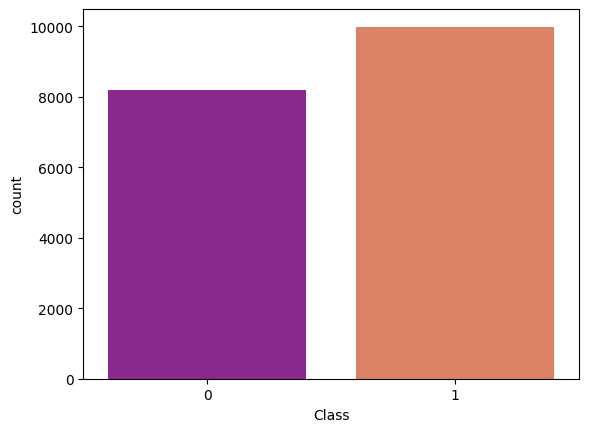

In [40]:
df["Class"].value_counts()                                  #This will give the count of unique values in class column
sns.countplot(x='Class', data=df,palette="plasma")          #This will plot the count of unique values in class column
plt.show

From above plot we can see that the dataset is balanced

Checking the relationship between the target and all fearures in single plot

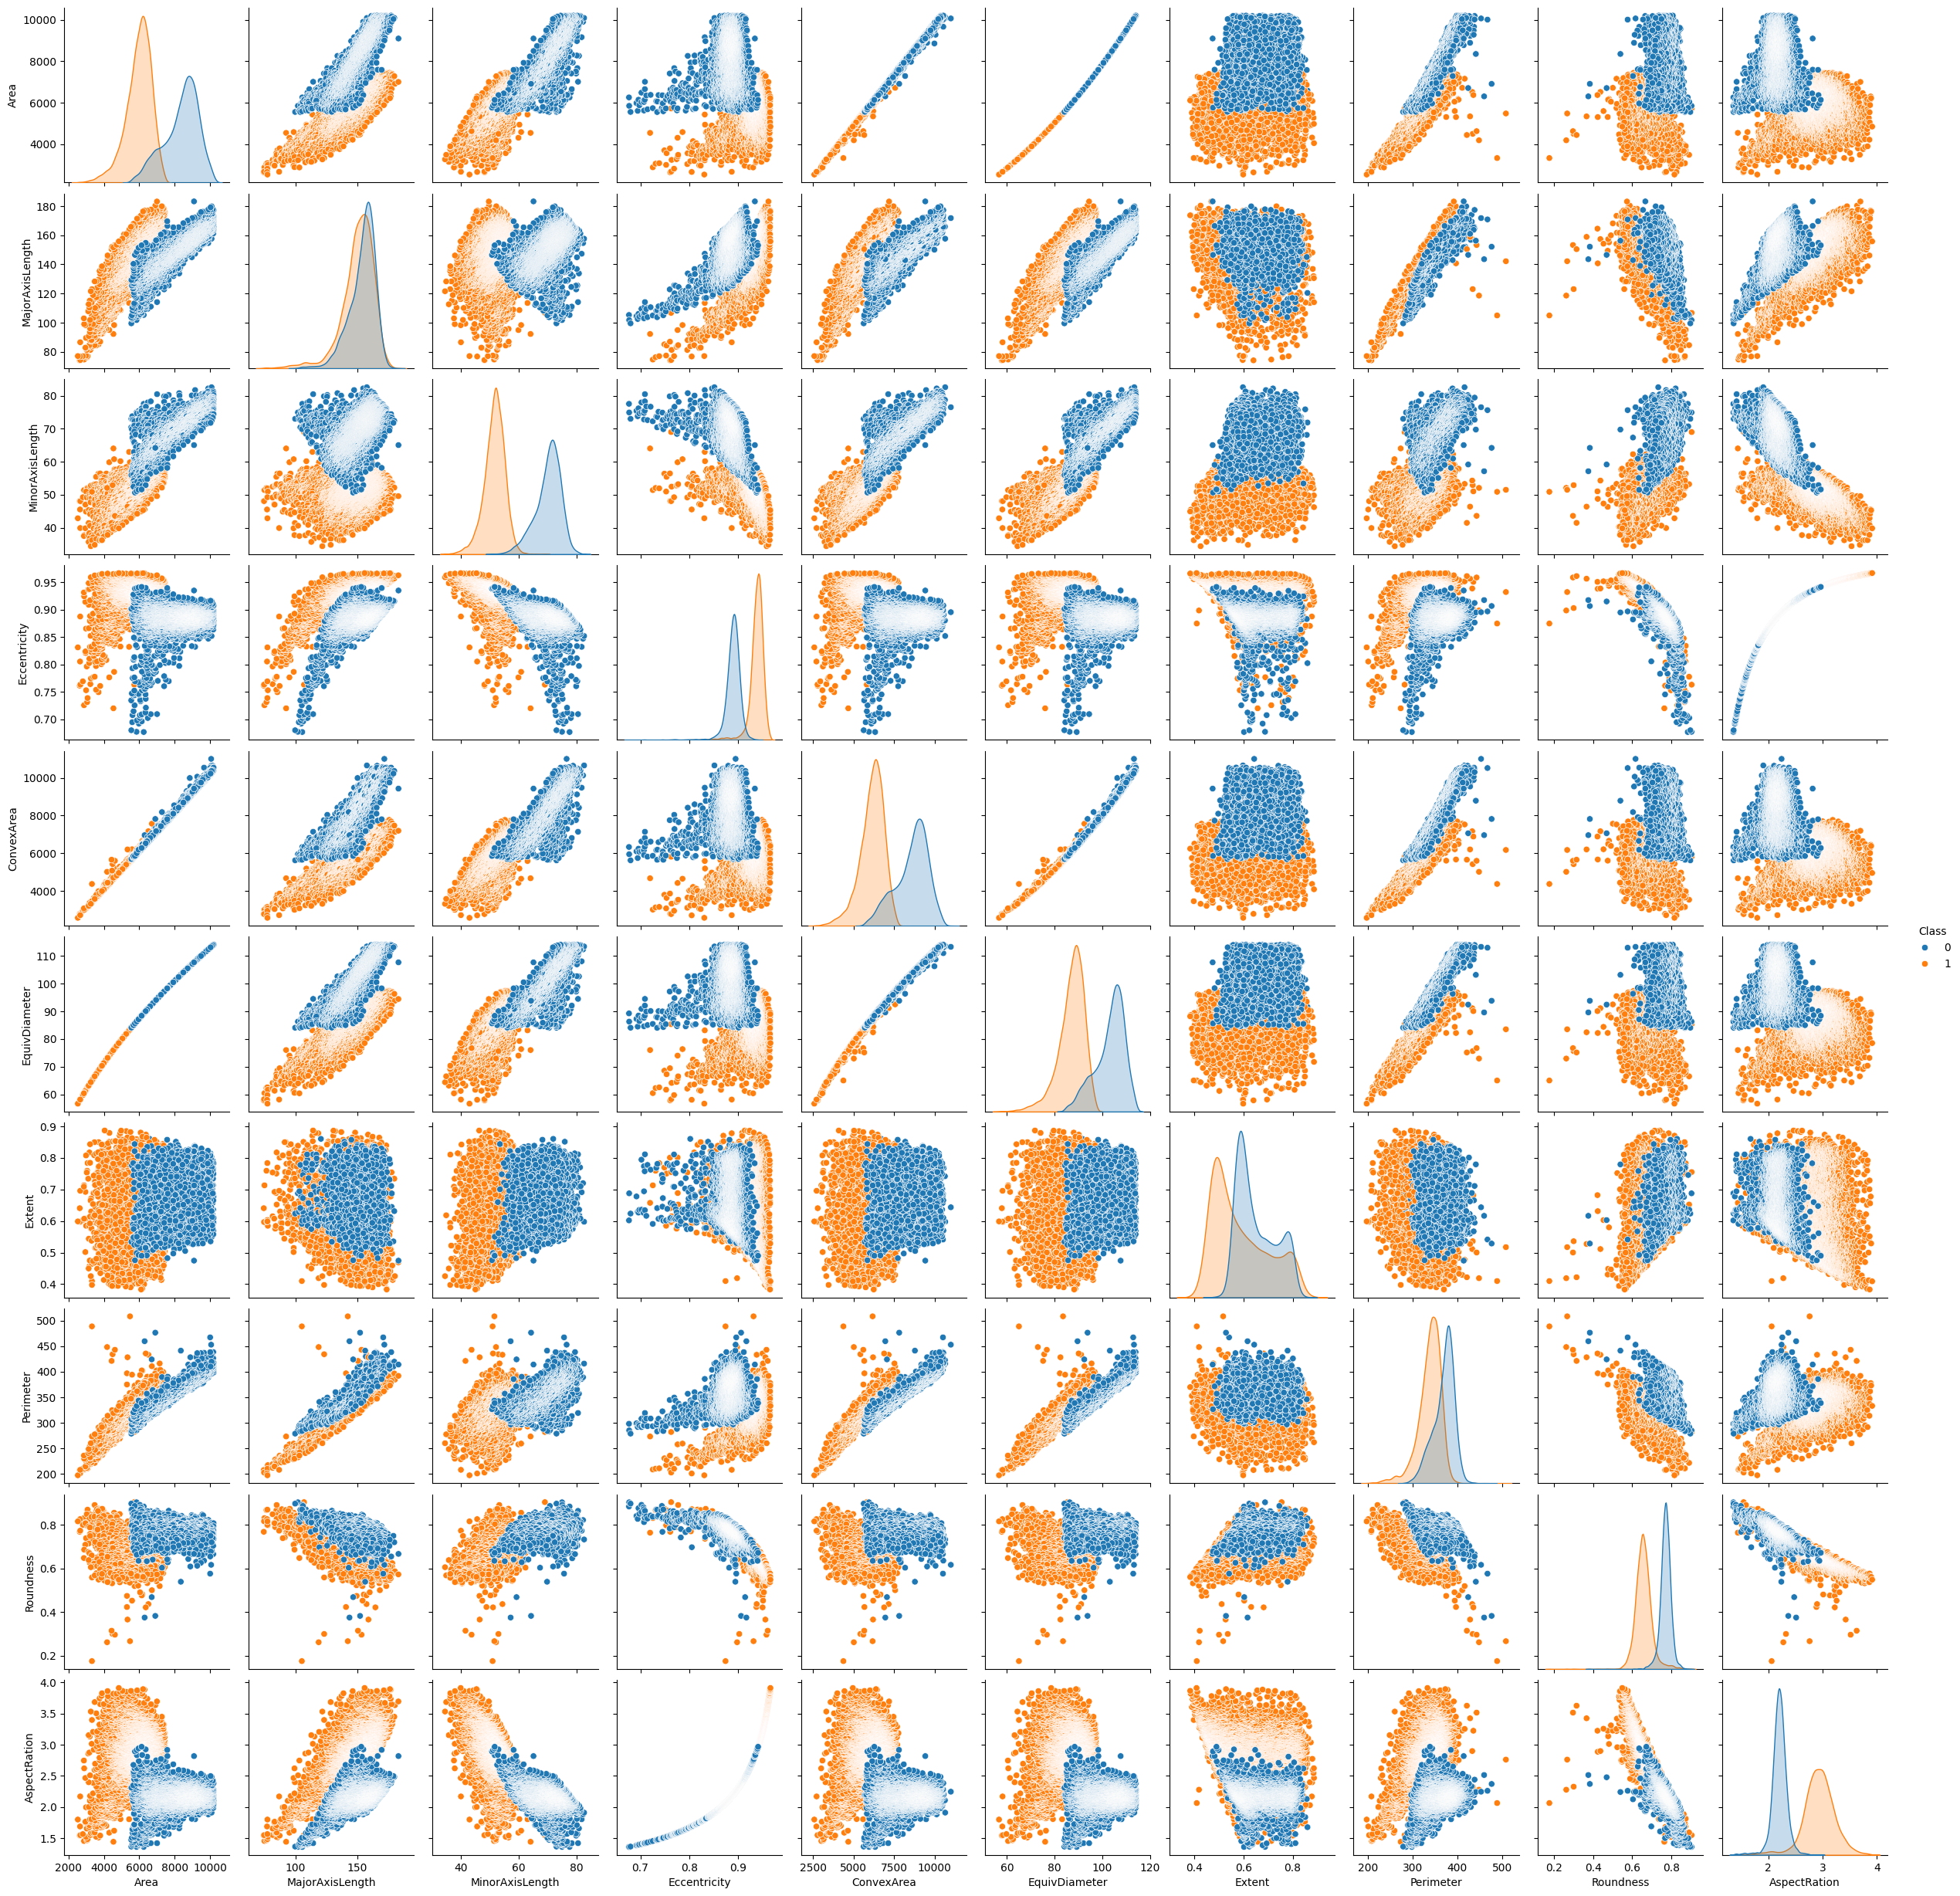

In [41]:
data_for_plotting =df.drop(columns=['id'])               # Dropping id column
sns.pairplot(data_for_plotting, hue='Class')             # plotting pairplot all features with class column
plt.show()

Observations: we can conclude that certain features like Area, Perimeter, MajorAxisLength, ConvexArea, and EquivDiameter are likely to be highly informative for classifying the rice grains. These features show good separation between the classes and have strong correlations with each other.

In contrast, features like Extent, Eccentricity, and Roundness show more overlap between the classes and may be less useful for classification on their own.

by observing above observation we can say that the target has Non-linear relation

Finding the correrealtion of features with target

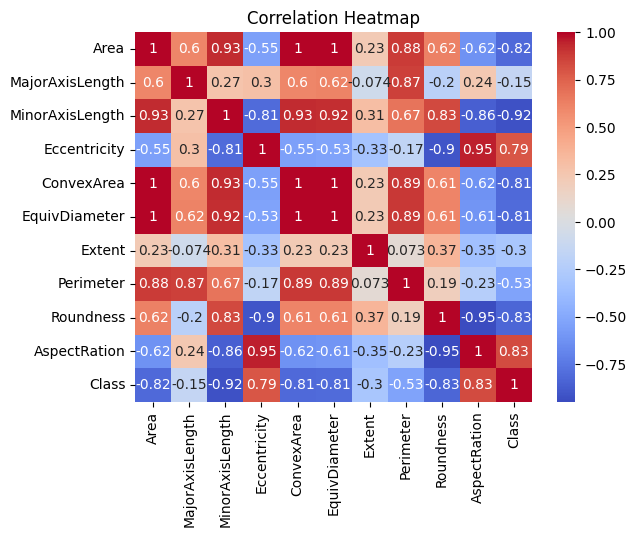

In [42]:
correlation_matrix = data_for_plotting.corr()                             # Finding the correlation of features with target
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')              # Plotting the correlation heatmap
plt.title('Correlation Heatmap')                                          # writing th title
plt.show()

Observation: Features such as Area, Perimeter, MajorAxisLength, ConvexArea, and EquivDiameter show high correlations among themselves and strong correlations with the target variable Class.

Eccentricity and AspectRation also show significant correlations with the target variable.

Features like Extent and Roundness show weaker correlations

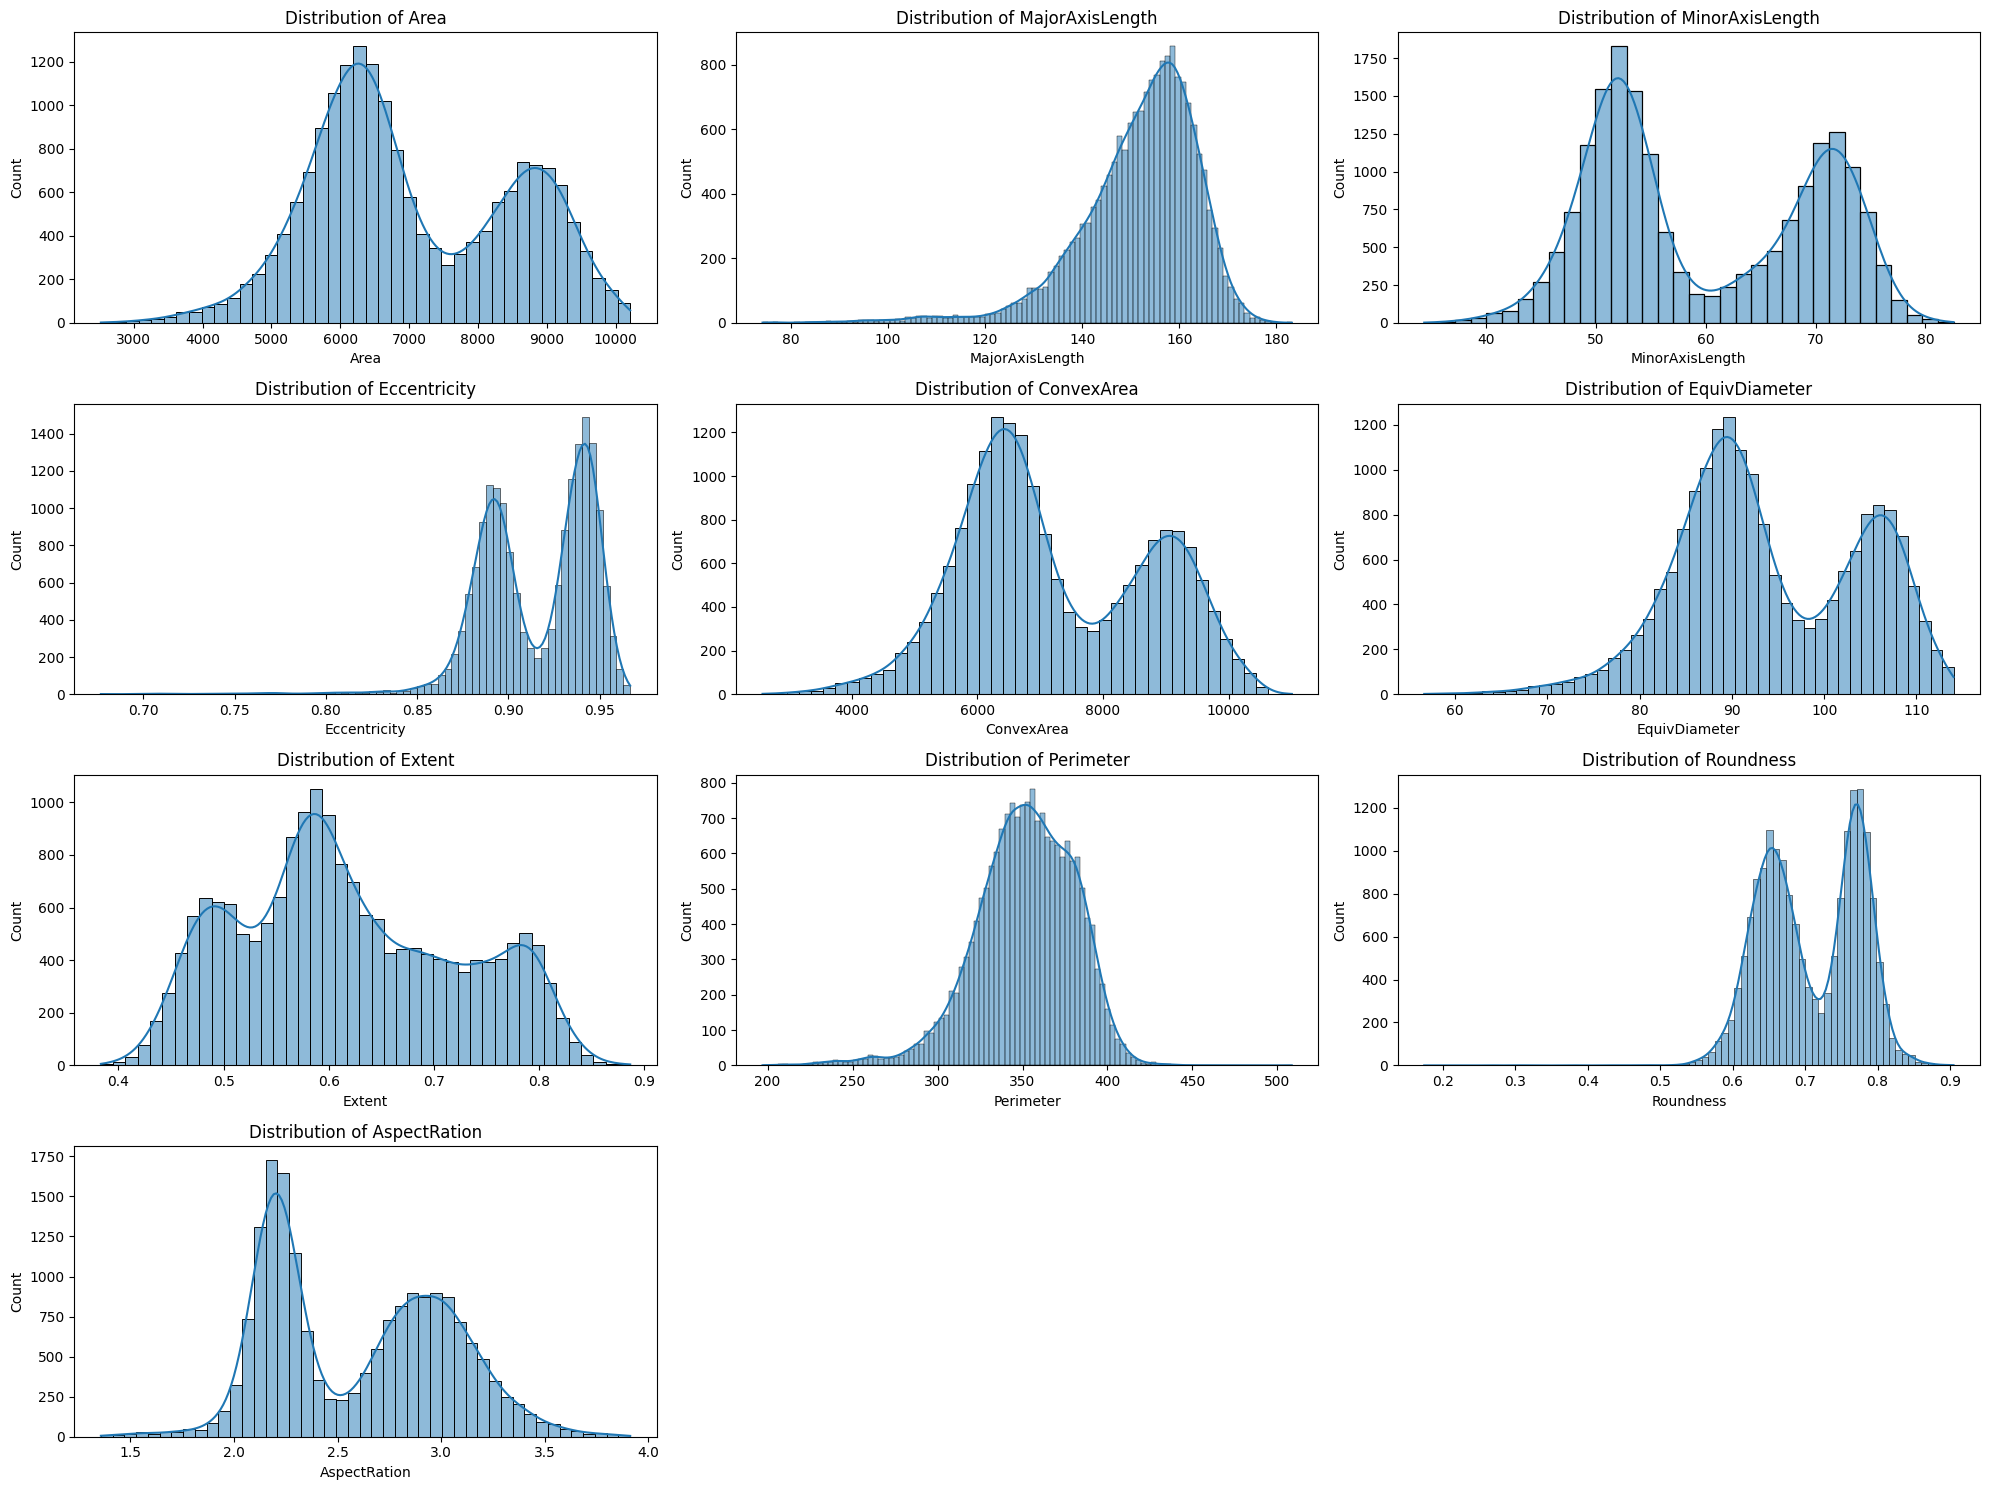

In [43]:
features=df.drop(columns=["Class","id"])                          # Dropping id and class column
plt.figure(figsize=(20, 15))                                      # Plotting the figure with dimension of 15,20
for i,feature in enumerate(features):
    plt.subplot(4, 3, i+1)                                        # Plotting the subplot with 4 rows and 3 columns
    sns.histplot(features[feature], kde=True,palette="bright")    # Plotting histplots with kde for each feature
    plt.title(f'Distribution of {feature}')                       # Writing the title for each subplot
plt.tight_layout()                                                # Adjusting the layout for better spacing
plt.show()

Observation: Several features (like Area, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, and Roundness) show two main peaks, indicating two types of rice grains.

Other features (like MajorAxisLength and Perimeter,AspectRation) show one main peak, indicating that most rice grains have similar measurements for these features.

The Extent feature shows multiple peaks, indicating a variety of shapes and sizes.

These observations suggest that the dataset likely contains two distinct types of rice grains. Identifying and focusing on the most informative features (like those with two peaks

Finding Outliers by ploting boxplots


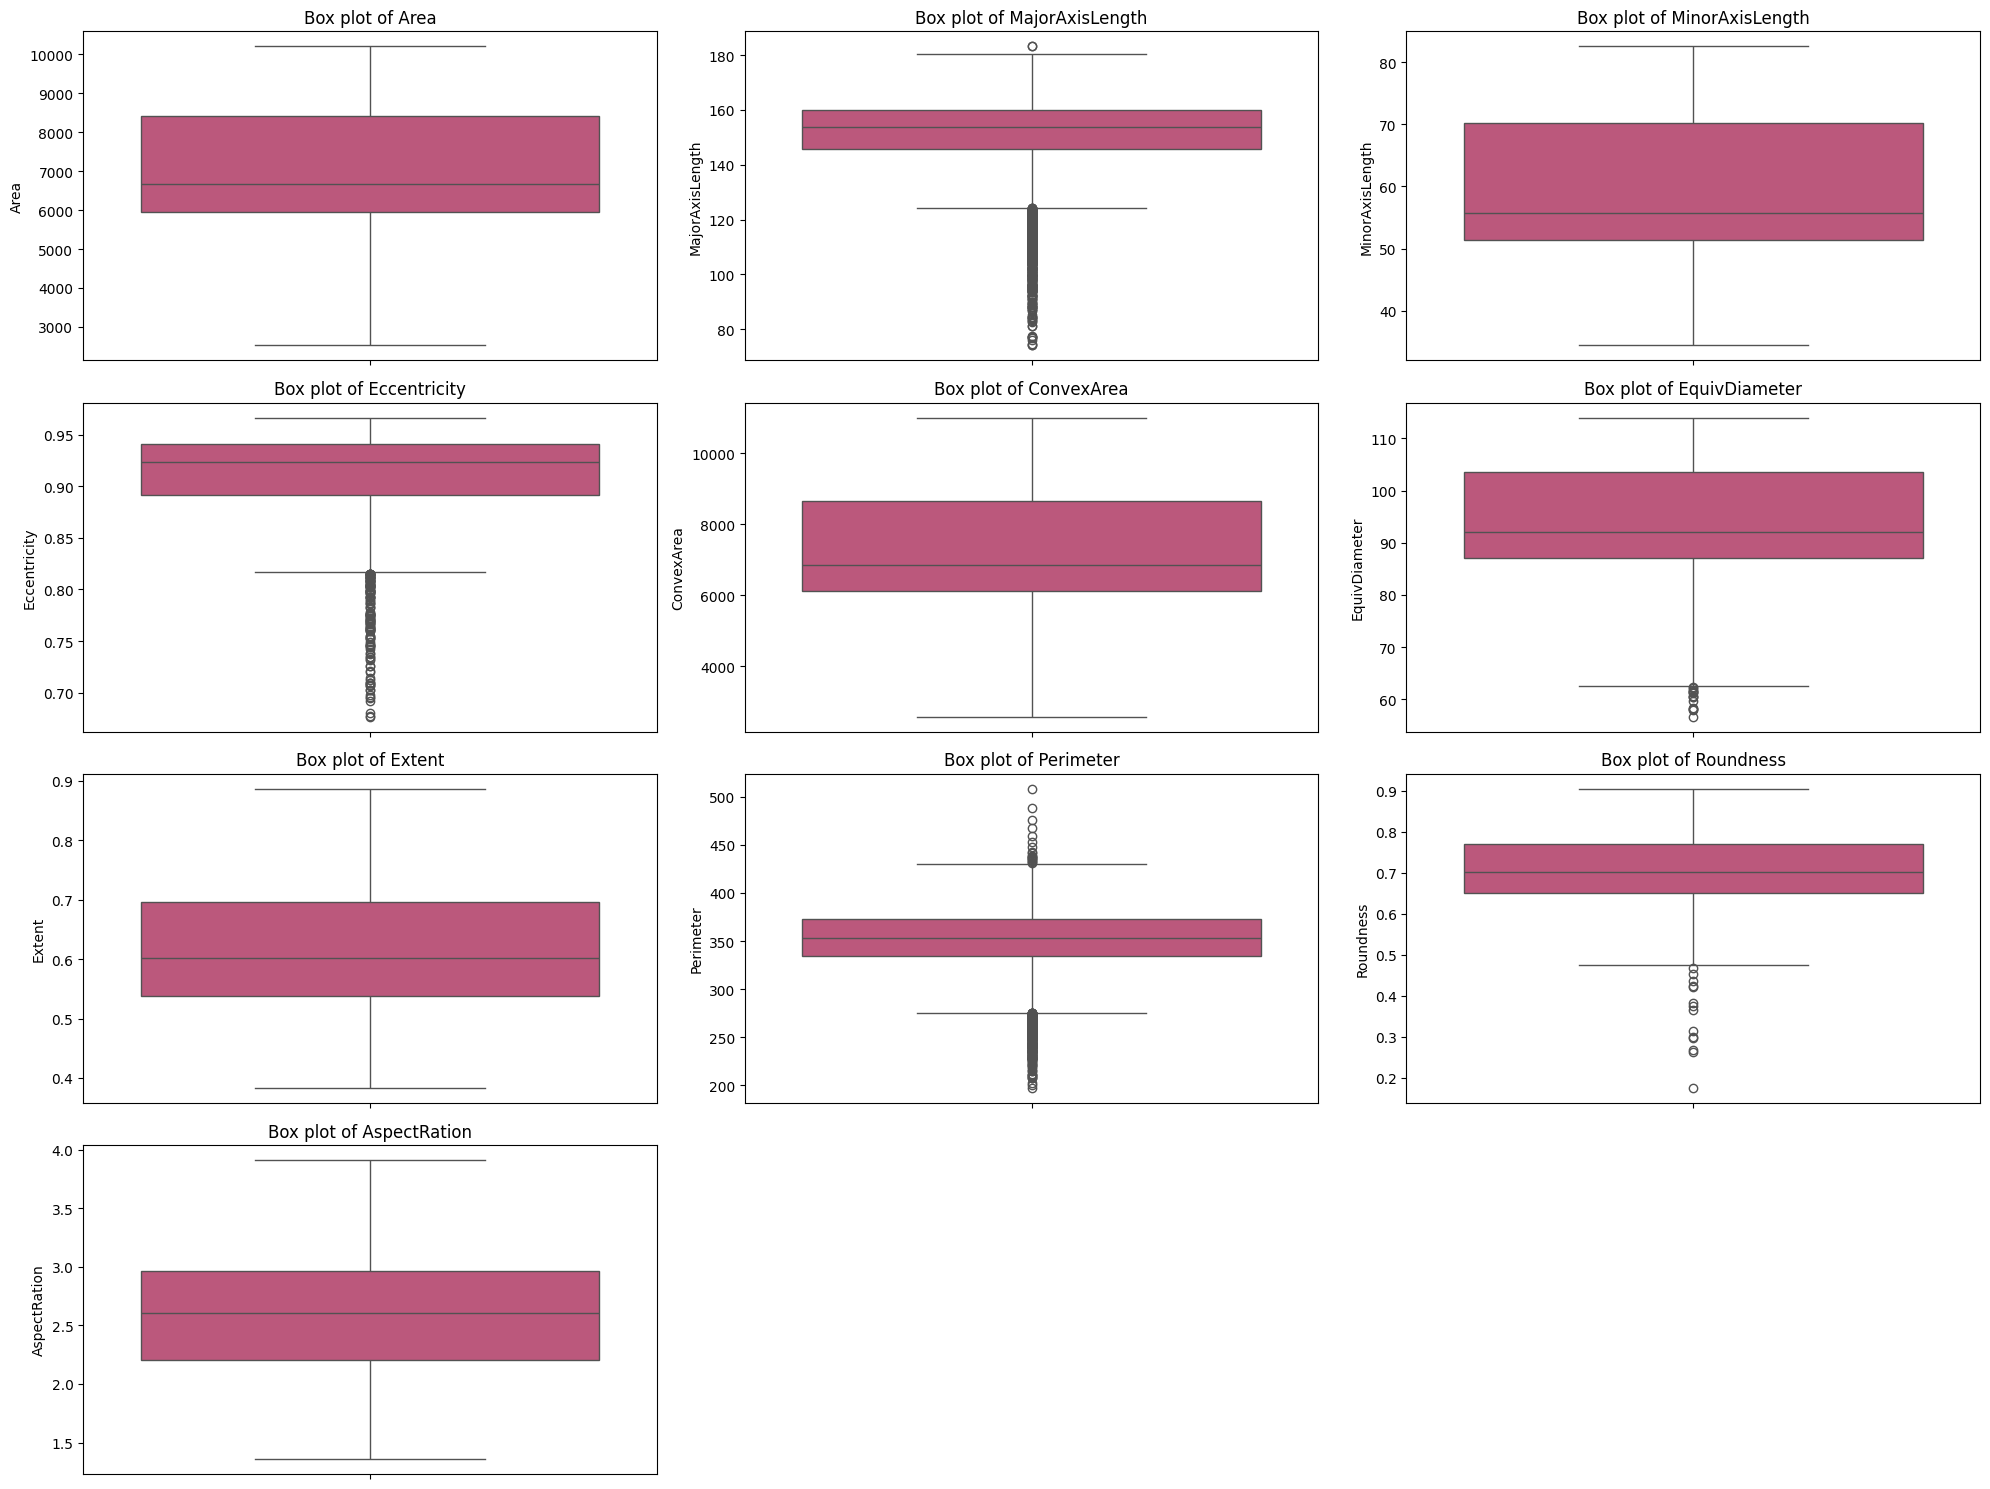

In [44]:
plt.figure(figsize=(20, 15))                              # Plotting the figure with dimension of 15,20
for i,feature in enumerate(features):
    plt.subplot(4, 3, i+1)                                # Plotting the subplot with 4 rows and 3 columns
    sns.boxplot(features[feature],palette="plasma")       # Plotting boxplots for each feature
    plt.title(f'Box plot of {feature}')                   # Writing the title for each subplot
plt.tight_layout()                                        # Adjusting the layout for better spacing
plt.show()

Some features, like Perimeter and MajorAxisLength, show slight skewness and potential outliers.

Counting outliers in rice classification dataset

In [45]:
data_without_id = df.drop(columns=["Class"])
numerical_cols = data_without_id.select_dtypes(include=[np.number]).columns
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data_without_id[numerical_cols].quantile(0.25)
Q3 = data_without_id[numerical_cols].quantile(0.75)
# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1
# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Find outliers
outliers = ((data_without_id[numerical_cols] < lower_bound) |
            (data_without_id[numerical_cols] > upper_bound))
# Count the number of outliers for each feature
outlier_counts = outliers.sum()
# Print the number of outliers for each feature
print("\nNumber of outliers in each feature:")
print(outlier_counts)
# Count the total number of rows with at least one outlier
total_outliers = outliers.any(axis=1).sum()
# Print the total number of rows with at least one outlier
print(f"\nTotal number of rows with at least one outlier: {total_outliers}")


Number of outliers in each feature:
id                   0
Area                 0
MajorAxisLength    538
MinorAxisLength      0
Eccentricity       136
ConvexArea           0
EquivDiameter       16
Extent               0
Perimeter          315
Roundness           14
AspectRation         0
dtype: int64

Total number of rows with at least one outlier: 578


Removing outliers

In [46]:

numerical_cols = data_without_id.select_dtypes(include=[np.number]).columns # selcting only numerical columns
Q1 = data_without_id[numerical_cols].quantile(0.25)
Q3 = data_without_id[numerical_cols].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df1 = data_without_id[~((data_without_id[numerical_cols] < lower_bound) |
                                     (data_without_id[numerical_cols] > upper_bound)).any(axis=1)]

Counting outliers after removing

In [47]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((df1[numerical_cols] < lower_bound) |
            (df1[numerical_cols] > upper_bound))

# Count the number of outliers for each feature
outlier_counts = outliers.sum()

# Print the number of outliers for each feature
print("\nNumber of outliers in each feature:")
print(outlier_counts)

# Count the total number of rows with at least one outlier
total_outliers = outliers.any(axis=1).sum()

# Print the total number of rows with at least one outlier
print(f"\nTotal number of rows with at least one outlier: {total_outliers}")


Number of outliers in each feature:
id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
dtype: int64

Total number of rows with at least one outlier: 0


Plotting boxplot for visualize the outliers

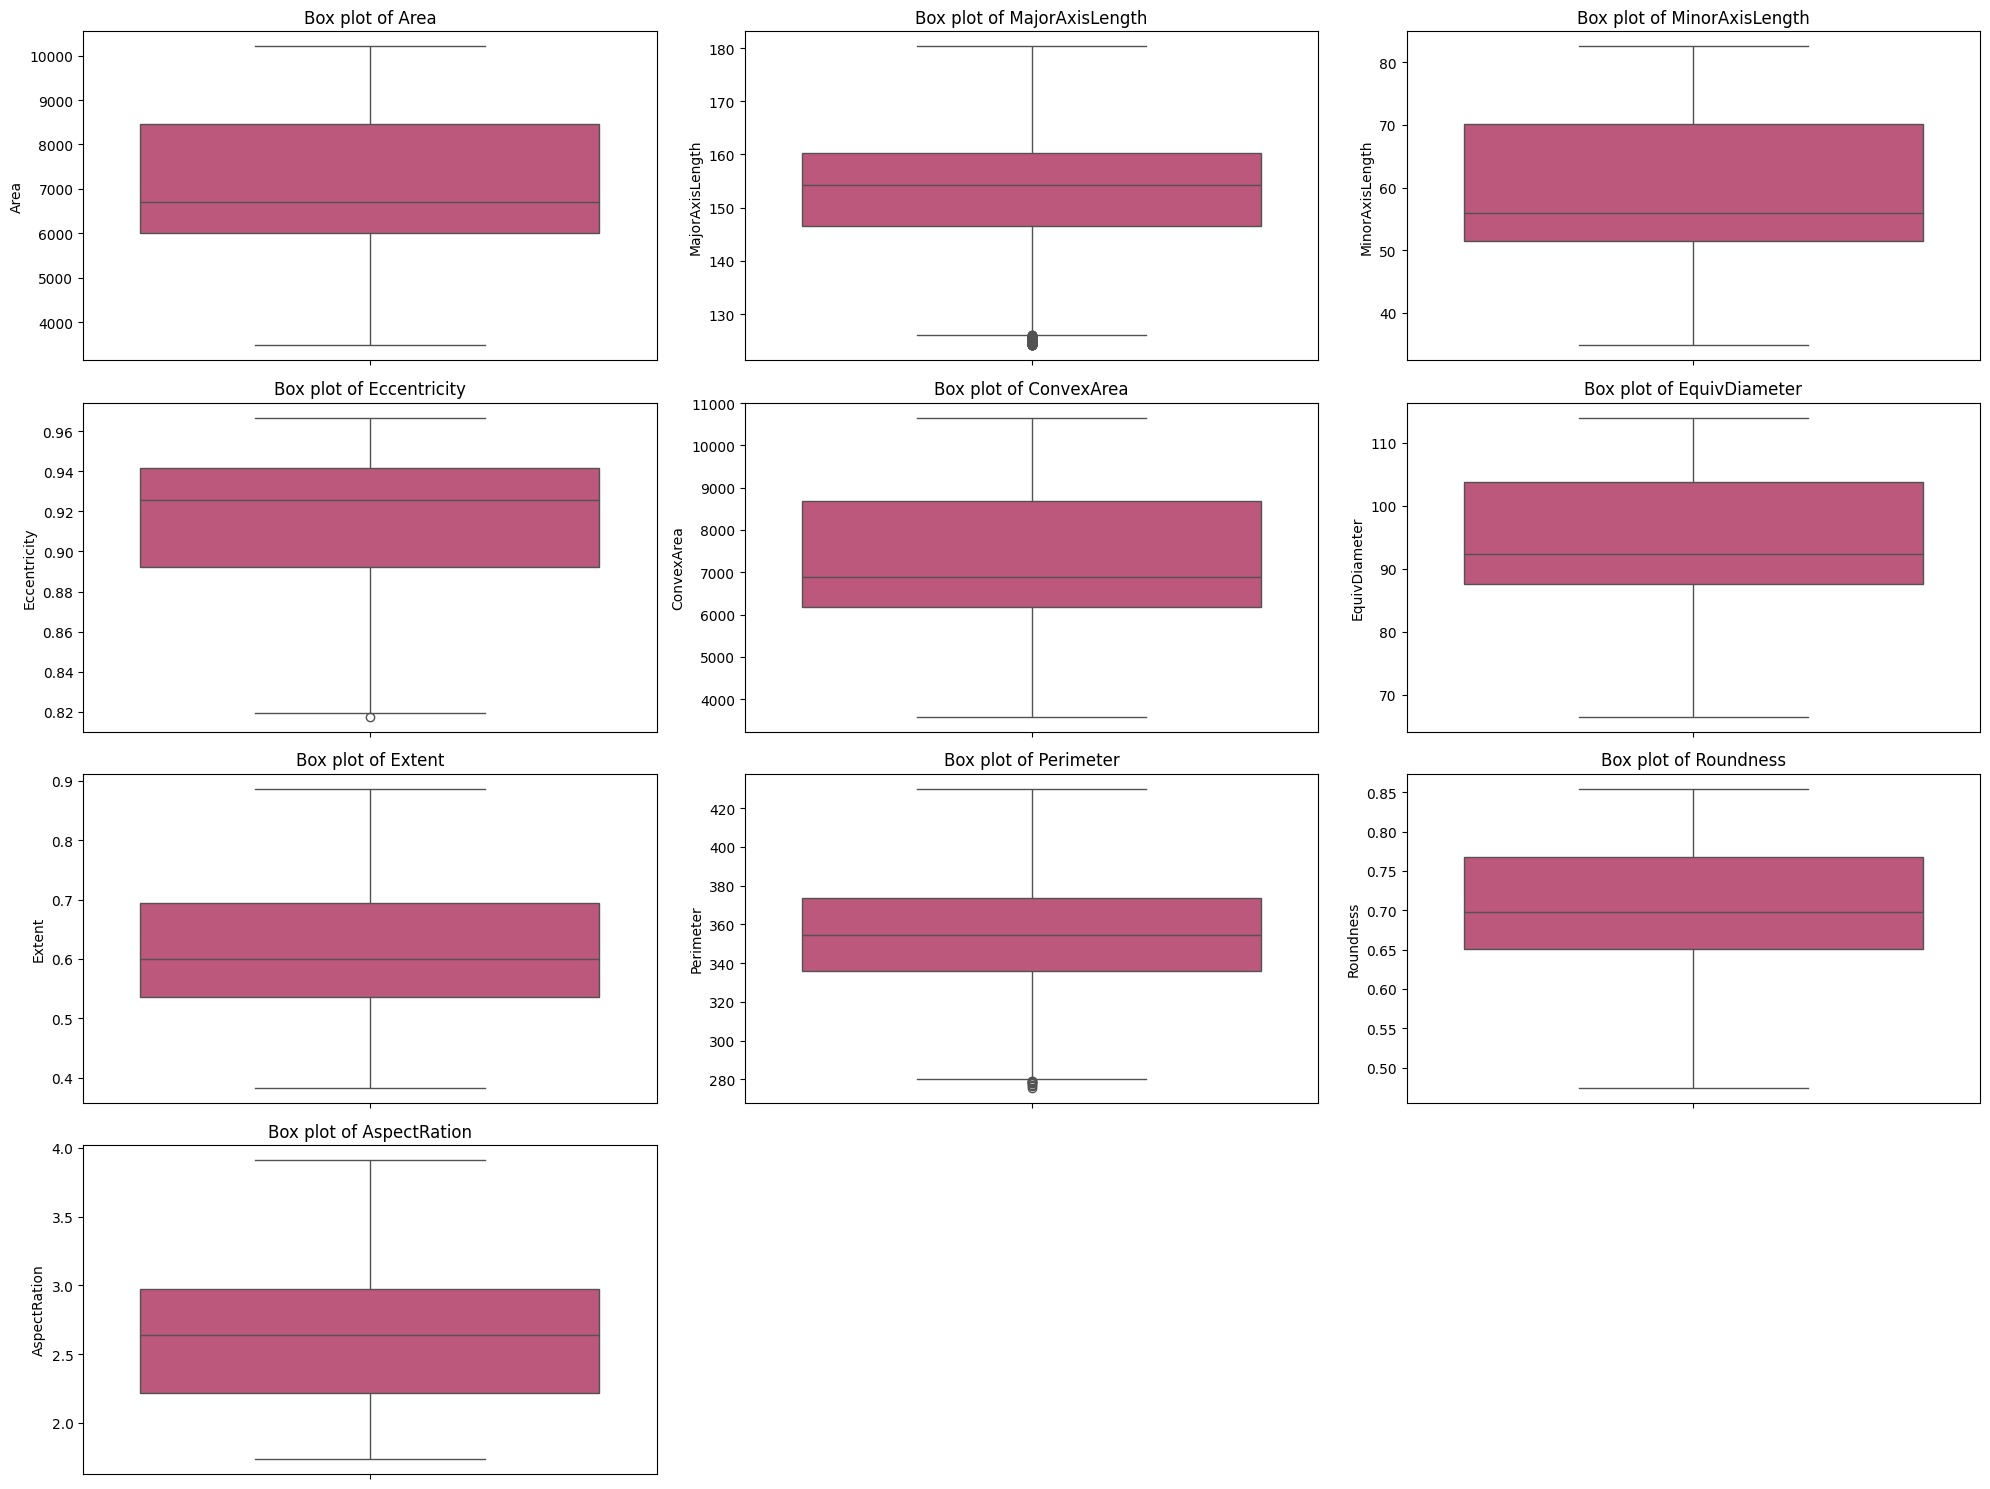

In [48]:
features=df1[[ 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity','ConvexArea', 'EquivDiameter', 'Extent', 'Perimeter', 'Roundness', 'AspectRation']]
plt.figure(figsize=(20, 15))                              # Plotting the figure with dimension of 15,20
for i,feature in enumerate(features):
    plt.subplot(4, 3, i+1)                                # Plotting the subplot with 4 rows and 3 columns
    sns.boxplot(features[feature],palette="plasma")       # Plotting boxplots for each feature
    plt.title(f'Box plot of {feature}')                   # Writing the title for each subplot
plt.tight_layout()                                        # Adjusting the layout for better spacing
plt.show()

## Conclusion:


* The rice classification dataset contains two distinct classes of rice grains,
characterized by significant differences in size and shape.

* Features such as Area, ConvexArea, EquivDiameter, MajorAxisLength, and Eccentricity are particularly informative for distinguishing between these classes.

* The insights gained from the correlation analysis and distribution plots highlight the importance of both size and shape descriptors in the classification task.


#5. Modelling

# Logistic Regression

## 5.1.Feature Selection

In [49]:
x=df.drop(columns=["Class","id"])                     # Dropping id and class column and remaining are considering as features
y=df[["Class"]]                                       # considering Class column as target variable
print(x.shape)                                        # printing x,y shapes
print(y.shape)

(18185, 10)
(18185, 1)


## 5.2.Data splitting and training

In [50]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  # Splitting the data
print(x_train.shape)                                                              # Printing x_train,y_train,y_test,x_test shapes
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12729, 10)
(5456, 10)
(12729, 1)
(5456, 1)


## 5.3.Standarize the features

In [51]:
# Scaling the data
scaling=StandardScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.transform(x_test)
# print(x_train)
# print(x_test)

## 5.3.Model Fitting

In [52]:
#Fitting LogisticRegression
classifier=LogisticRegression(random_state=10)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=10)

## 5.4.Model evaluation

In [129]:
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
LR_score=accuracy_score(y_test,y_pred)*100               # Printing the accuracy score
LR_score

98.61733050514573


98.29545454545455

Applying Bosting techniques

In [130]:
# Applying AdaBoostClassifier Bosting techniques
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier(n_estimators=4,random_state=100)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

98.61733050514573


98.29545454545455

In [131]:
# Applying GradientBoostingClassifier Bosting techniques
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier(n_estimators=15,max_depth=1, random_state=10)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)            # Predicting the test data
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

98.60947442847042


98.25879765395894

In [132]:
# Applying XGBClassifier Bosting techniques
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)              # Predicting the test data
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

100.0


98.73533724340176

In [133]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
classifier=LogisticRegression(random_state=10)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

99.0494147222877


98.71700879765396

# Decission Tree Classifier

Decision Tree Classifier without standard scaling

In [134]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="gini",random_state=1000)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
DT_score=accuracy_score(y_test,y_pred)*100               # Printing the accuracy score
DT_score

100.0


98.00219941348973

In [136]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=1000)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

100.0


98.24046920821115

Decision Tree Classifier with standard scaling

In [138]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
# Scaling the data
scaling=StandardScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.transform(x_test)
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="gini",random_state=1000)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

100.0


98.00219941348973

In [139]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
# Scaling the data
scaling=StandardScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.transform(x_test)
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",random_state=1000)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

100.0


98.24046920821115

Applying Boosting Techniques

In [140]:
# Applying AdaBoostClassifier Bosting techniques
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier(n_estimators=4,random_state=100)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

98.61733050514573


98.29545454545455

In [141]:
# Applying GradientBoostingClassifier Bosting techniques
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier(n_estimators=15,max_depth=1, random_state=10)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

98.60947442847042


98.25879765395894

In [142]:
# Applying XGBClassifier Bosting techniques
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

100.0


98.73533724340176

# Random Forest Classifier

Random Forest Classifier without standard scaling

In [144]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=3, criterion="gini", random_state=1000, min_samples_leaf=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
RF_score=accuracy_score(y_test,y_pred)*100               # Printing the accuracy score
RF_score

99.52077932280619


98.55205278592375

In [145]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=3, criterion="entropy", random_state=1000, min_samples_leaf=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100

99.55220362950742


98.55205278592375

Random Forest Classifier with standard scaling

In [146]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
# Scaling the data
scaling=StandardScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.transform(x_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=3, criterion="entropy", random_state=1000, min_samples_leaf=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

99.55220362950742


98.55205278592375

Applying Bossting Techniques

In [147]:
# Applying AdaBoostClassifier Bosting techniques
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier(n_estimators=4,random_state=100)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

98.61733050514573


98.29545454545455

In [148]:
# Applying GradientBoostingClassifier Bosting techniques
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier(n_estimators=15,max_depth=1, random_state=10)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

98.60947442847042


98.25879765395894

In [149]:
# Applying XGBClassifier Bosting techniques
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

100.0


98.73533724340176

Finding Importance of features in rice classification dataset

In [150]:
feature_score=pd.Series(classifier.feature_importances_,index=x.columns).sort_values(ascending=False)
feature_score

MinorAxisLength    0.951267
Eccentricity       0.011539
Roundness          0.008355
Area               0.007359
Perimeter          0.006073
ConvexArea         0.005910
MajorAxisLength    0.005284
Extent             0.004212
EquivDiameter      0.000000
AspectRation       0.000000
dtype: float32

After observing above output we can say that the feature MinorAxisLength has more importance than other in ourrice classification dataset.

EquivDiameter and AspectionRation has zero importance.so now drop the both two columns and train the model again.

In [151]:
x=df.drop(columns=["Class","id","EquivDiameter","AspectRation"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
# Scaling the data
scaling=StandardScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.transform(x_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=3, criterion="entropy", random_state=1000, min_samples_leaf=2)
classifier.fit(x_train, y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100

99.52077932280619


98.47873900293254

# Support Vector Machine

Support Vector Machine with Scaling

In [152]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
scaling=StandardScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.transform(x_test)
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=1000)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

99.13583156571607


98.77199413489735

SVM without scaling

In [153]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=1000)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

92.68599261528793


92.43035190615836

Applying Boosting techniques

In [154]:
# Applying AdaBoostClassifier Bosting techniques
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier(n_estimators=4,random_state=100)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

98.61733050514573


98.29545454545455

In [155]:
# Applying GradientBoostingClassifier Bosting techniques
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier(n_estimators=15,max_depth=1, random_state=10)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

98.60947442847042


98.25879765395894

In [156]:
# Applying XGBClassifier Bosting techniques
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

100.0


98.73533724340176

# K-Nearest Neighbours classifier

K-Nearest Neighbours without scaling

In [157]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
classifier=KNeighborsClassifier(n_neighbors=5,p=2)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
KNN_score=accuracy_score(y_test,y_pred)*100
KNN_score

98.90014926545683


97.98387096774194

KNN with Scaling

In [158]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
scaling=StandardScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.transform(x_test)
classifier=KNeighborsClassifier(n_neighbors=5,p=2)
classifier.fit(x_train,y_train)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100

99.159399795742


98.69868035190615

Applying Boosting Techniques

In [159]:
# Applying AdaBoostClassifier Bosting techniques
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier(n_estimators=4,random_state=100)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

98.61733050514573


98.29545454545455

In [160]:
# Applying GradientBoostingClassifier Bosting techniques
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier(n_estimators=15,max_depth=1, random_state=10)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

98.60947442847042


98.25879765395894

In [161]:
# Applying XGBClassifier Bosting techniques
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

100.0


98.73533724340176

# Naive bayes classifier

Naive bayes classifier without scaler

In [162]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
NB_score=accuracy_score(y_test,y_pred)*100
NB_score

97.76887422421242


97.41568914956011

Naive bayes Classifier with scaling

In [163]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
scaling=StandardScaler()
x_train=scaling.fit_transform(x_train)
x_test=scaling.transform(x_test)
classifier=GaussianNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100

98.44449681828895


98.11217008797654

Applying Boosting techniques

In [164]:
# Applying AdaBoostClassifier Bosting techniques
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier(n_estimators=4,random_state=100)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

98.61733050514573


98.29545454545455

In [165]:
# Applying GradientBoostingClassifier Bosting techniques
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier(n_estimators=15,max_depth=1, random_state=10)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

98.60947442847042


98.25879765395894

In [166]:
# Applying XGBClassifier Bosting techniques
from xgboost import XGBClassifier
classifier=XGBClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score

100.0


98.73533724340176

# 7.Choosing The Best model

By observing all above models accuracies we can say that the Support vector machine is the best model for this Rice classification.

In [167]:
x=df.drop(columns=["Class","id"])                                                 # Dropping id and class column and remaining are considering as features
y=df[["Class"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)  #Splitting the data
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=1000)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)               # Predicting the test data
ypred_train=classifier.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100               # Printing the accuracy score


92.68599261528793


92.43035190615836

In [168]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# Get the best parameters and best model from RandomizedSearchCV
# best_params_random = grid_search.best_params_
# best_model_random = grid_search.best_estimator_
# print(best_params_random)
# print(best_model_random)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)
y_pred=grid_search.predict(x_test)               # Predicting the test data
ypred_train=grid_search.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)
accuracy_score(y_test,y_pred)*100


Fitting 3 folds for each of 108 candidates, totalling 324 fits
99.69361300966297


98.75366568914956

In [169]:

param_dist = {
    'kernel': ['rbf', 'poly', 'sigmoid',"linear"]



}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist,  cv=3,  random_state=102)
random_search.fit(x_train, y_train)

# Get the best parameters and best model from RandomizedSearchCV
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

# Make predictions on the test set using the best model from RandomizedSearchCV
y_predSVC = best_model_random.predict(x_test)
ypred_train= random_search.predict(x_train)         # Predicting the train data
print(accuracy_score(y_train,ypred_train)*100)

# Evaluate the model on the test set
accuracy_score(y_test,y_pred)*100

98.99442218556052


98.75366568914956

## 7.1.Classification report

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92      1653
           1       0.89      0.98      0.94      1984

    accuracy                           0.93      3637
   macro avg       0.94      0.92      0.93      3637
weighted avg       0.93      0.93      0.93      3637



## 7.2.Confusion Matrix

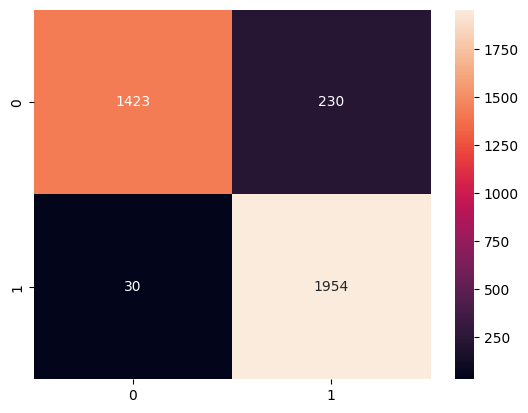

In [97]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

In [98]:
3377/3637

0.9285125103106956

## 7.3.ROC-AOC Curve

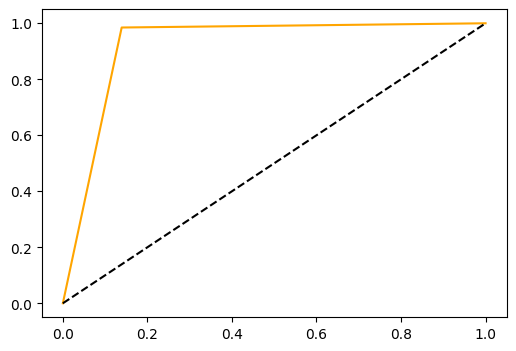

In [99]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0,1],[0,1],"k--")

## 7.4.Cross Validation scores

In [100]:
from sklearn.model_selection import cross_val_score
cv_merics =cross_val_score (classifier, x, y, cv=5)
cv_merics

array([0.88369535, 0.94281001, 0.95188342, 0.95133352, 0.91009073])

Visualization Cross valiation scores

Text(0.5, 1.0, 'Cross validation scores')

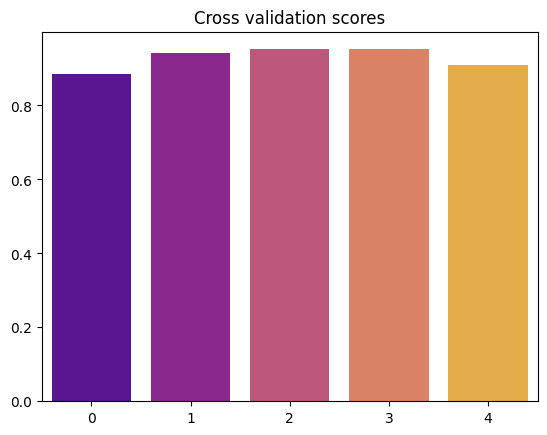

In [106]:
# plt.boxplot(cv_merics)
# plt.show()
sns.barplot(cv_merics,palette="plasma")
plt.title("Cross validation scores")


# 7.5.Visualization of model performances

creating the dataframe for each model and its accuracy

In [107]:
models_scores = pd.DataFrame({
    'Model' : [ 'Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier','Support Vector Machine Classifier',"K-Nearest Neighbours Classifiers","Naive bayes Classifier"],
    'Score' : [ LR_score, DT_score, RF_score,SVM_score,KNN_score,NB_score]
})
# models_scores.sort_values(by = 'Score', ascending = False)
models_scores

Model      Score
0                Logistic Regression  98.717009
1           Decision Tree Classifier  98.002199
2           Random Forest Classifier  98.552053
3  Support Vector Machine Classifier  92.741935
4   K-Nearest Neighbours Classifiers  97.983871
5             Naive bayes Classifier  97.415689

Visualizing the models and their accuracy scores using barplot

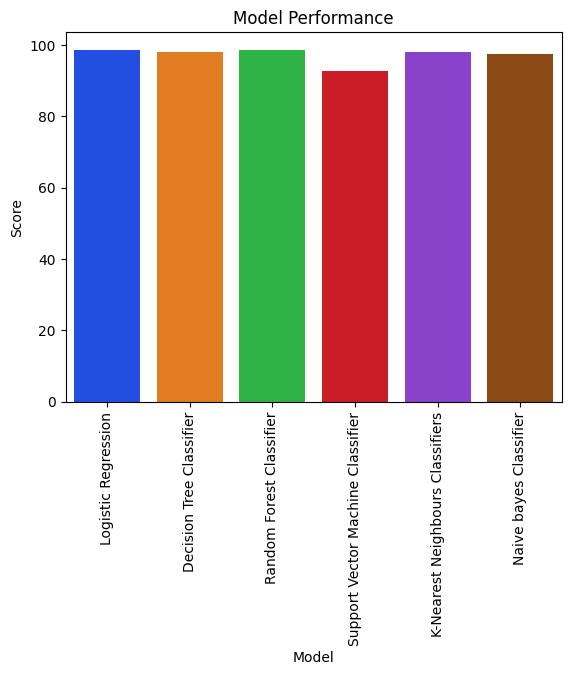

In [170]:
sns.barplot(data=models_scores,x="Model",y="Score",palette="bright")
plt.xticks(rotation=90)
plt.title("Model Performance")
plt.show()

# 8.Conclusion

* By observing above plot we can say that all models are performed well with scores close to each other.
* Unlike all other models, SVM maintains a balance between bias and variance, resulting in better generalization to unseen data.
* The confusion matrix analysis highlights that SVM minimizes both Type I and Type II errors better than some of the other models.
* The array of cross-validation metrics shows that SVM consistently performs at a high level, indicating stability and reliability.
* The model's performance suggests that SVM can handle the complexity of the dataset's feature space better than some other models.
* Unlike SVM ,KNN and Naive bayes also perform well for this Rice classification dataset